In [47]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

fatal: destination path 'ML-Bootcamp' already exists and is not an empty directory.


In [48]:
!pip install pandas numpy seaborn matplotlib pycaret

In [49]:
#IMPORTING ALL NECESSARY LIBRARIES & PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pycaret.classification import *

In [50]:
df = pd.read_csv("/content/ML-Bootcamp/Week-4/Day-1/Dataset/dataset_full.csv")
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [51]:
#Summary statics of the dataset

print(df.describe())

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

In [52]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

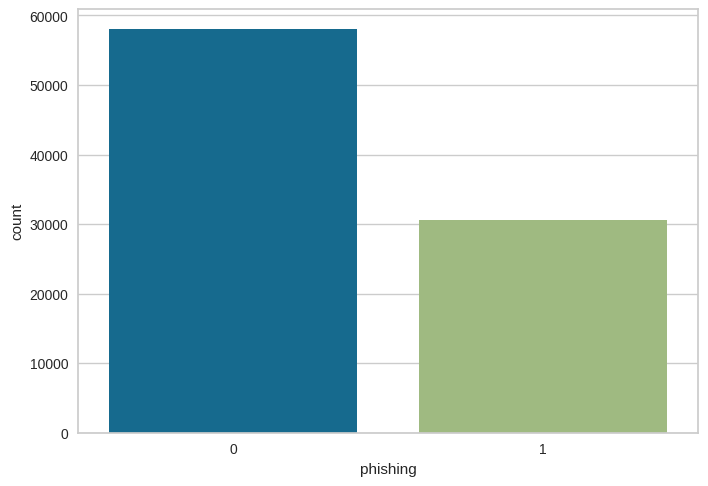

In [53]:
#visualize the given dataset

sns.countplot(x="phishing", data=df)  # Y(target value)
plt.show()

In [54]:
cols_to_drop = ['url_google_index',
                'domain_google_index',
                'server_client_domain',
                'tld_present_params',
                'time_response',
                'domain_spf',
                'qty_ip_resolved',
                'qty_nameservers',
                'qty_mx_servers',
                'ttl_hostname',
                'url_shortened']
df = df.drop(cols_to_drop, axis=1)

In [55]:
extra_one = ['qty_vowels_domain']
df = df.drop(extra_one, axis=1)

In [56]:
rows, columns = df.shape
print("Numbers of rows:", rows)
print("Numbers of columns:", columns)

Numbers of rows: 88647
Numbers of columns: 100


PERFORM FEATURE ENGINEERINGON ON OUR DATASET

In [57]:
original_features = list(df.columns)

In [58]:
original_features

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'domain_length',
 'domain_in_ip',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_sp

In [59]:
dataset_array = np.array(df)

In [60]:
print(dataset_array)

[[3 0 0 ... 0 0 1]
 [5 0 1 ... 1 0 1]
 [2 0 0 ... 1 0 0]
 ...
 [2 1 0 ... 1 0 1]
 [2 0 0 ... 1 0 1]
 [2 0 0 ... 0 0 0]]


In [61]:
features_indices = []
attributes = ['url','domain','file','params']

In [62]:
new_dataset = {}

In [63]:
for index, name in enumerate(original_features):  #index represents index of current and the name represents the name in the current feature
  if 'qty' in name and name.split('_')[-1] in attributes:    #'qty' in the substring
    features_indices.append([index,name.split('_')[-1]])     # last part is from the attributes
  else:
    new_dataset[name] = dataset_array[:,index]    # it assigns the columns that dont meet the condition to the new dictionary

In [64]:
for index, attribute in features_indices:          # this line literates over the features_indices list, which contains pairs of
  if attribute == 'domain':
    if f'qty_char_{attribute}' not in new_dataset.keys():    # qty_char 'url','domain','file','params' in the new_dataset
      new_dataset[f'qty_char_{attribute}'] = np.zeros(rows)  # it is create new key in the new_dataset with the new ex:qty_char_url

    new_dataset[f'qty_char_{attribute}'] += dataset_array[:,index]

In [66]:
df1 = pd.DataFrame(new_dataset).astype(int)   # to convert the data into the integer datatypes

In [67]:
df1[df1<-1] = -1   # if the condition is true i wanna change that element with -1
df1

,length_url,domain_length,domain_in_ip,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,...,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
0,25,17,0,1,0,0,1,0,0,0,...,7,-1,0,60781,-1,-1,0,0,1,2
1,223,16,0,3,0,0,3,0,0,0,...,9,165,0,36024,579,150,1,0,1,2
2,15,14,0,0,0,0,1,0,0,0,...,0,-1,0,4766,-1,-1,1,0,0,2
3,81,19,0,2,0,2,5,0,0,0,...,9,-1,0,20454,-1,-1,1,0,1,2
4,19,19,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,53831,6998,306,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,23,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,8560,5509,334,0,0,0,4
88643,34,34,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,26496,5046,431,0,2,0,2
88644,70,22,0,1,1,0,5,0,0,0,...,11,-1,0,394695,1844,712,1,0,1,1
88645,28,27,0,0,0,0,1,0,0,0,...,0,-1,0,47583,-1,-1,1,0,1,2


In [68]:
# Summary statistics of our dataset

print(df1.describe())

         length_url  domain_length  domain_in_ip  qty_dot_directory  \
count  88647.000000   88647.000000  88647.000000       88647.000000   
mean      36.347615      18.560820      0.002267          -0.323666   
std       46.191590       6.598694      0.047564           0.899499   
min        4.000000       4.000000      0.000000          -1.000000   
25%       17.000000      14.000000      0.000000          -1.000000   
50%       22.000000      18.000000      0.000000          -1.000000   
75%       38.000000      22.000000      0.000000           0.000000   
max     4165.000000     231.000000      1.000000          19.000000   

       qty_hyphen_directory  qty_underline_directory  qty_slash_directory  \
count          88647.000000             88647.000000         88647.000000   
mean              -0.360813                -0.477997             0.713685   
std                1.101398                 0.682409             2.216137   
min               -1.000000                -1.000000

In [69]:
# setting up the data for modelling

setup(data = df1, target = "phishing")   # target variable is phishing which we want to build model

,Description,Value
0,Session id,1746
1,Target,phishing
2,Target type,Binary
3,Original data shape,"(88647, 31)"
4,Transformed data shape,"(88647, 31)"
5,Transformed train set shape,"(62052, 31)"
6,Transformed test set shape,"(26595, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [70]:
# comparing and select the best data model

best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:16:53
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9640,0.9920,0.9535,0.9431,0.9483,0.9207,0.9208,5.7950
et,Extra Trees Classifier,0.9633,0.9906,0.9528,0.9418,0.9473,0.9192,0.9192,5.1350
dt,Decision Tree Classifier,0.9500,0.9446,0.9233,0.9315,0.9274,0.8893,0.8893,0.4320
gbc,Gradient Boosting Classifier,0.9483,0.9875,0.9312,0.9202,0.9257,0.8860,0.8861,9.3180
ada,Ada Boost Classifier,0.9293,0.9815,0.8910,0.9033,0.8971,0.8433,0.8433,2.6740
lr,Logistic Regression,0.9121,0.9659,0.9154,0.8436,0.8780,0.8095,0.8111,3.2700
ridge,Ridge Classifier,0.9017,0.0000,0.9539,0.8003,0.8703,0.7922,0.8001,0.1420
lda,Linear Discriminant Analysis,0.9010,0.9704,0.9551,0.7983,0.8697,0.7909,0.7992,0.4800
knn,K Neighbors Classifier,0.8940,0.9418,0.8294,0.8592,0.8440,0.7638,0.7641,4.6950
nb,Naive Bayes,0.8510,0.9528,0.6596,0.8793,0.7538,0.6501,0.6639,0.2690


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9654,0.9933,0.9504,0.9495,0.9499,0.9234,0.9234,9.4640
rf,Random Forest Classifier,0.9640,0.9920,0.9535,0.9431,0.9483,0.9207,0.9208,5.7950
et,Extra Trees Classifier,0.9633,0.9906,0.9528,0.9418,0.9473,0.9192,0.9192,5.1350
lightgbm,Light Gradient Boosting Machine,0.9613,0.9923,0.9453,0.9428,0.9441,0.9144,0.9144,1.6040
dt,Decision Tree Classifier,0.9500,0.9446,0.9233,0.9315,0.9274,0.8893,0.8893,0.4320
gbc,Gradient Boosting Classifier,0.9483,0.9875,0.9312,0.9202,0.9257,0.8860,0.8861,9.3180
ada,Ada Boost Classifier,0.9293,0.9815,0.8910,0.9033,0.8971,0.8433,0.8433,2.6740
lr,Logistic Regression,0.9121,0.9659,0.9154,0.8436,0.8780,0.8095,0.8111,3.2700
ridge,Ridge Classifier,0.9017,0.0000,0.9539,0.8003,0.8703,0.7922,0.8001,0.1420
lda,Linear Discriminant Analysis,0.9010,0.9704,0.9551,0.7983,0.8697,0.7909,0.7992,0.4800


In [71]:
tuned_model = tune_model(best_model, n_iter=1, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8595,0.9612,0.9884,0.7146,0.8295,0.7152,0.7424
1,0.8543,0.9590,0.9893,0.7067,0.8245,0.7058,0.7350
2,0.8653,0.9666,0.9925,0.7219,0.8359,0.7264,0.7529
3,0.8643,0.9666,0.9888,0.7217,0.8344,0.7241,0.7499
4,0.8582,0.9609,0.9879,0.7127,0.8281,0.7127,0.7402
5,0.8677,0.9674,0.9837,0.7286,0.8371,0.7298,0.7532
6,0.8572,0.9621,0.9888,0.7110,0.8272,0.7110,0.7391
7,0.8575,0.9645,0.9879,0.7118,0.8274,0.7115,0.7392
8,0.8640,0.9645,0.9902,0.7207,0.8342,0.7237,0.7500


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [72]:
predictions = predict_model(tuned_model, data=df1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9725,0.9959,0.9600,0.9603,0.9602,0.9391,0.9391
